In the [previous]() blog post, we saw how Linkin Park's musical style changed over the years, by looking at the mean and variation of audio features of their songs. In paricular, we looked at 4 audio features - duration, energy, loudness and valence. In this post, we'll try to relate some of these features to the general "mood" of LP's songs, and how these moods changed through the years. You don't need to read the previous post to understand this one - I am only using 2 of the 4 previous audio features - energy and valence. Also, I will be explaining these features again. 

The code for this post is available at [this github repository]().

Before we start the analysis, though, let me try to articulate what I mean when I say "mood" of a song.

## Mood and Music

If you're anything more than a casual listener of music, you will find a strong correlation between a song and the emotions it invokes in you. Some hardcore listeners might even experience using music as a tool to manipulate or "hack" their emotions - listening to a particular song to switch from one mood to the next. For example - some people might play highly energetic music in their room when they're feeling lethargic, to get some momentum and start doing things. After a long day at work, another person might put on some relaxing "peaceful" music to switch from a hyper focused state to a more relaxed state of mind. "Somber" or "neutral" music is usually considered to be suited to listening while working, since it takes you into an objective state of mind. \
The [Gracenote Music API] 

## Dataset

We'll be using the [Gracenote Music Web API](https://developer.gracenote.com/web-api) to get mood information for Linkin Park's songs. [This blog post](http://www.gracenote.com/computing-musical-mood-at-gracenote/) contains more detailed information on the algorithms behind classification of mood of each song. We will be using a subset of the 25 moods used by Gracenote. Following are the moods we'll be using:

* Peaceful
* Sentimental
* Upbeat
* Sensual
* Serious
* Somber
* Exciting
* Energizing
* Aggressive

For those that didn't read the previous post, here is a quick recap of the 2 audio features (energy and valence) we'll be using to relate to the "mood" of a song:

* Energy - a number between 0 and 1 which is a perceptual measure of intensity and activity of a song. According to Spotify's API documentation :
> Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* Valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by the track.
> Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

[Here]() is the script I used to get all the data, using Spotify Web API's python wrapper - [Spotipy]() and gracenote web API's python wrapper - [pygn]().

## Introductory Analysis

In [9]:
import pickle
data = pickle.load(open('lp-data-2.p', 'rb'))
data.drop(['tempo', 'loudness', 'duration'], inplace=True, axis=1)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [10]:
data.columns

Index([u'name', u'album', u'mood', u'energy', u'valence'], dtype='object')

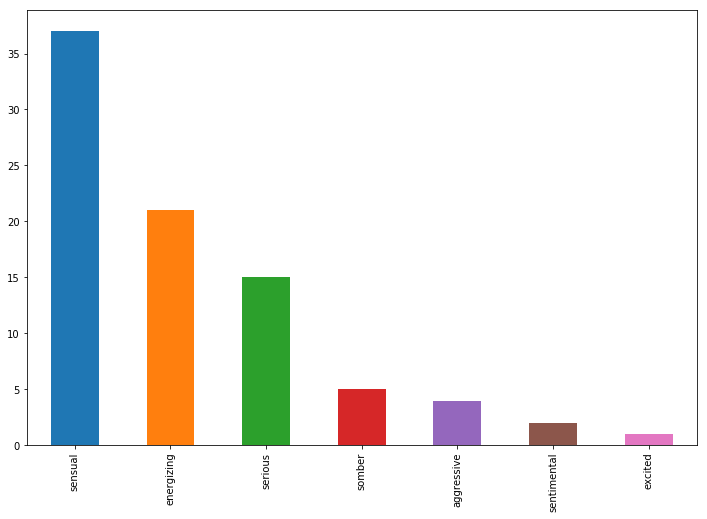

In [13]:
data.mood.value_counts().plot(kind='bar')

As we can see, most of LP's song come in the "Sensual" moood category, with "Energizing" and "Serious" being the second and third most popoular moods.

#Examples of sensual, energetic and serious songs.
#mention that due to mapping of moods from 25 to 9, they might not be super accurate. Mention about level1 moods

In [14]:
data[data.mood=='sensual']

,name,album,mood,energy,valence
1,Good Goodbye (feat. Pusha T and Stormzy),Onemorelight,sensual,0.840,0.4520
4,Invisible,Onemorelight,sensual,0.740,0.5620
5,Heavy (feat. Kiiara),Onemorelight,sensual,0.671,0.4380
6,Sorry for Now,Onemorelight,sensual,0.584,0.2510
9,Sharp Edges,Onemorelight,sensual,0.714,0.6240
15,Wastelands,Huntingparty,sensual,0.993,0.6140
20,Final Masquerade,Huntingparty,sensual,0.852,0.4280
23,IN MY REMAINS,Livingthings,sensual,0.907,0.4510
27,CASTLE OF GLASS,Livingthings,sensual,0.911,0.6850
29,ROADS UNTRAVELED,Livingthings,sensual,0.788,0.5810


## Mood taxonomoy based on arousal-positivity scale

Here, I'm going to refer to some super interesting work done by Ting Neo on [Muisic Mood Clasification](https://neokt.github.io/projects/audio-music-mood-classification/). She defines these moods on a arousal-positivity scale. Esentially, moods are defined using 2 axis - Arousal, and Positivity. Her modelling of the 25 level 1 gracenote moods is done by having 5 separate classes for each axis. Since I have narrowed it down to 9 moods, we'll be having 3 classes on each scale. This is how it looks like:

## image

## Mood of LP's albums